<a href="https://colab.research.google.com/github/HanSong19/PALS0039-Introduction-to-Deep-Learning-for-Speech-and-Language-Processing-/blob/main/PALS0039_Ex_3_1_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

#Exercise 3.1 Keras practice

In this exercise we use Keras to build and train a small 4-2-4 [autoencoder](https://en.wikipedia.org/wiki/Autoencoder).

(a) The following code block constructs a simple network with 4 inputs, one hidden layer (with 2 nodes), and 4 outputs. Run the code and add comments to explain what each line does. Is this a regression or classification model? What are the ranges of output values the model is capable of producing?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
## if it is only import tensorflow, then, when I use later it has to by a=tensor.flow.keras.models.Sequential() but when I import Sequential from 
## from tensorflow.keras.modls import Sequential, then I can just call it like a=Sequential()

#it initiate a neural network: I have a model and it is an empty neural network
#sequential is a multi layer neural network
model = Sequential()

#no need of the input layer because I only need the input form not layer. 
#model.add : adds a layer to the model
#the first layer is a dense: danse is a fully connected to all the previous input with weights
#the first parameter is the number of unit, here, there are 2 units, The number of unit can be changed depending on the task/ goal fo the model
#input shape: store the weights (only need it in the first layer and from the second later, it will be automatic)
# input_shape(4,) mans it is a single vector, 4 means that there are 4 features (inputs)
model.add(Dense(2, activation='sigmoid', input_shape=(4,), name="hidden_layer"))

#if I want more hidden layer, I can add more and more
#model.add(Dense(4, activation='sigmoid', name="output_layer2"))

model.add(Dense(4, activation='sigmoid', name="output_layer"))

#Reconstruc obtimizer. Stochaic gradient descent. I can choose, leanring rate=0.1 is very fast
#momentum: taking the precious step into account
sgd = SGD(learning_rate=0.1, momentum=0.9)

#.compile is that I finished build and secure the model and I am ready to train the model
model.compile(loss='mse', optimizer=sgd)
# output shape (None,2), None=empty because waiting for the input
# first node has 10 parameter (first layer has 2 input that is 4(input_shape)*2(2 output nodes) +2 biases)
# the second node has 12 parameter (2*4+4 (4 biases of the second layer))

model.summary()


'''
the model looks like this

input hidden output
x.             x
x.      x.     x
x.      x.     x
x              x

This model reduces the dimension. 4 input to 2 in the hidden layer. why? 
maybe 4 features are too many and see if we can reduce dimensions.
auto encoder is often used to reduce the #of features automatically.

'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 10        
                                                                 
 output_layer (Dense)        (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Instructions to build the Keras model
def build_model():
  # Variable "model" is of class tensorflow.keras.models.Sequential
  # That class represents neural networks, where one layer is processed after another. (This represents almost all neural networks, but look for skip connections and the ResNet if interested in more powerful architectures. They are used in our application, for example the WaveNet: https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio)
  # The neural network is empty at this point.
  model = Sequential()
  # Class tensorflow.keras.models.Sequential has a function "add" that adds a layer to the network
  # We add the first layer. It is of type Dense, the typical layer in a MLP that is fully connected to the previous layer
  # It has two units. Their activation functions are sigmoids.
  # Because it is the first layer we have to specify the number of inputs. Four inputs for our two nodes lead to 4x2=8 weights, plus 2 bias weights.
  # The name is useful for bigger networks or when we want to copy parts of the network.
  model.add(Dense(2, activation='sigmoid', input_shape=(4,), name="hidden_layer"))
  # We add another layers with 4 nodes. The model already knows that this layer receives inputs from the two nodes of the previous layer.
  # This layer will have 2x4 = 8 weights plus 4 bias weights.
  model.add(Dense(4, activation='sigmoid', name="output_layer"))
  # We create an object for the optimizer, from the class SGD, and we name it "sgd". We give it bigger parameters than the defaul to train faster.
  sgd = SGD(learning_rate=0.1, momentum=0.9)
  # The "compile()" of class tensorflow.keras.models.Sequential actually creates the model and we can start training.
  # We specify the loss function to be the mean squared error and the optimizer.
  # If we wanted to use an optimizer with its default values, we could simply specify it by name, for example optimizer='Adam'
  model.compile(loss='mse', optimizer=sgd)
  return model

# Input data
#I can have more input data by adding [x,x,x,x] at the end
X = np.array([[1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
# Output data
Y = X.copy()

print("Input\n", X)
print("Output\n", Y)

#(a)
# - Regression
# - [0.0, 1.0] -- Sigmoid activation function

Input
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Output
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


(b) Complete the code block below to train the model on the data defined above using the model's [`fit` method](https://keras.io/api/models/model_training_apis/#fit-method). Use the specification in the comments to set up the training parameters accordingly.

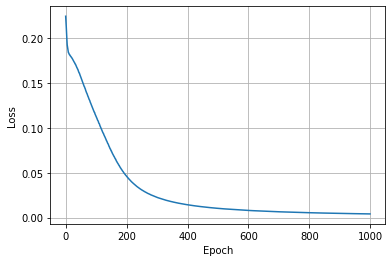

1/1 [==============================] - 0s 166ms/step
Predicted:
[[0.9  0.   0.05 0.05]
 [0.   0.91 0.07 0.07]
 [0.08 0.06 0.92 0.  ]
 [0.09 0.06 0.   0.92]]


In [4]:
# Build the model using the earlier function
model = build_model()

# Train the model using 1000 iterations through the dataset with weight updates after processing each individual sample:
#(b)
# vector is low alphabet and metrix is Cap letters
#interation is one update of weight. Epochs is how often do I run the model

training_info = model.fit(X, Y, epochs=1000, batch_size=1, verbose=0)

# Plot the value of the loss function over training
plt.plot(training_info.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Print the predicted output values for the training data
print("Predicted:", np.around(model.predict(X), decimals=2), sep="\n")


The following code block displays the network configuration, including number of parameters (weights) that were estimated during training. Furthermore it displays the actual weights and biases of the trained model.

In [5]:
# Print a summary of the structure of the model
model.summary()

# Get the weights as a numpy array
weights=model.get_weights()

# Print the weights for the different layers
# odd numbers are biases 
print()
print("hidden-to-input:", weights[0], "", sep="\n")
#weight 1 is bias of the first output
print("hidden-bias:", weights[1], "", sep="\n")
#weight2 is the weight from the previous output
print("output-to-hidden:", weights[2], "", sep="\n")
#bias of the second layer
print("output-bias:", weights[3], "", sep="\n")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 10        
                                                                 
 output_layer (Dense)        (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________

hidden-to-input:
[[ 4.095022   3.8660212]
 [-3.352769  -3.411203 ]
 [-3.4864464  3.4757807]
 [ 3.2428386 -3.5654728]]

hidden-bias:
[-0.37336275 -0.28939566]

output-to-hidden:
[[ 4.7086515 -5.6291575 -5.7548356  5.465237 ]
 [ 4.6164346 -5.5515137  5.49278   -5.7941384]]

output-bias:
[-6.914473   2.605479  -2.646178  -2.5879366]



(c) Using the sigmoid function defined below, write some code to manually calculate the outputs of the network using the `weights` and `X` as input. **OR** Explain how the weights and biases are used to calculate the networks outputs.

In [ ]:
# definition of the signoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
#(c)
#For each training sample:
for i in range(4):
  # Get the input
  input = X[i]
  # Calculate the hidden layer activations
  hidden_activations = sigmoid(np.matmul(input, weights[0]) + weights[1])
  # Get the output layer activations
  output_activations = sigmoid(np.matmul(hidden_activations, weights[2]) + weights[3])
  # Print the input, hidden and output values for this sample
  print(input, np.around(hidden_activations, decimals=2), np.around(output_activations, decimals=2), sep="\t")


[1. 0. 0. 0.]	[0.03 0.97]	[0.92 0.09 0.   0.06]
[0. 1. 0. 0.]	[0.98 0.96]	[0.06 0.89 0.05 0.  ]
[0. 0. 1. 0.]	[0.91 0.02]	[0.   0.09 0.92 0.05]
[0. 0. 0. 1.]	[0.01 0.04]	[0.07 0.   0.07 0.91]


# (d) What are autoencoders useful for?

In [ ]:
#(d)
#https://en.wikipedia.org/wiki/Autoencoder#Applications